In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Data/gemstone.csv')
df.head()

In [14]:
# lets Drop the 'id' and other duplicate column
df.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
df.head(3)

In [23]:
df.isnull().sum() #For checking the null values in dataset

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [19]:
df.info() # To take an overview the datatypes of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [24]:
df.duplicated().sum() # A we can see there is no null value in dataset.

0

In [25]:
num_columns = df.columns[df.dtypes!='O']
cat_columns = df.columns[df.dtypes=='O']
# Seprating columns on behalf of dtypes

print('Numerical col: ',num_columns)
print('categorical_col: ',cat_columns)

Numerical col:  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical_col:  Index(['cut', 'color', 'clarity'], dtype='object')


In [26]:
df.clarity.value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [27]:
df.color.value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [28]:
df.cut.value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [33]:
df[cat_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [35]:
df[num_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [20]:
df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [21]:
df.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [22]:
df.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [44]:
cut_map = {'Premium':5, 'Very Good':4, 'Ideal':3, 'Good':2, 'Fair':1}
color_map = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [47]:
# mapping the categorical column on ther basis of Ordering its values.
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['cut'] = df['cut'].map(cut_map)

In [48]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,5,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,3,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,3,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,5,4,4,62.6,59.0,7.65,7.61,4.77,14453


<Axes: >

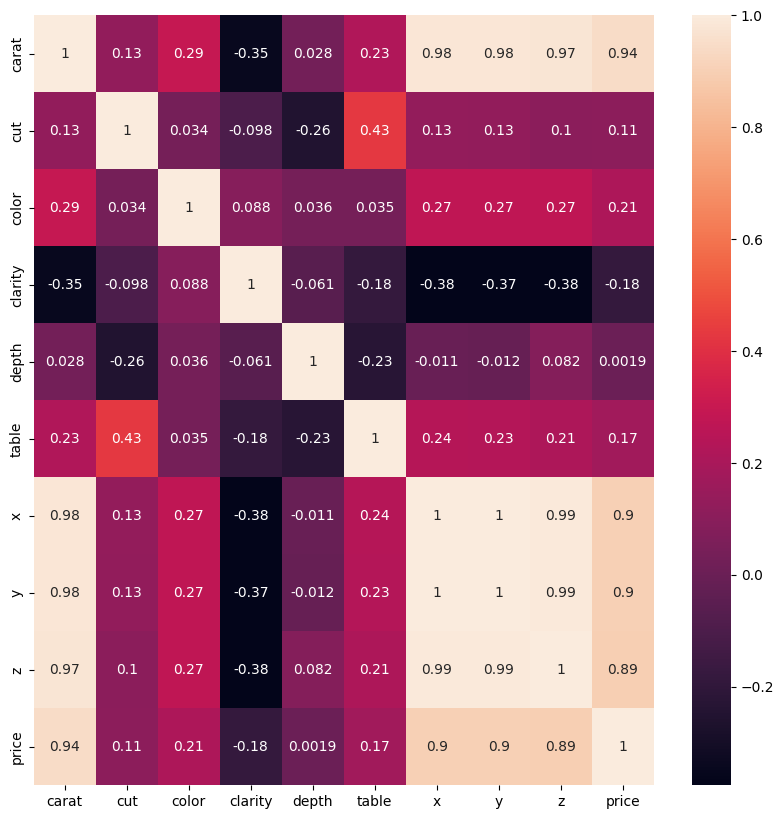

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

###  We can observe here that column X, Y, Z, Carat are strongly correlated with each other. So We can drop any three of them. but Curerntly We'll keep these all.